In [3]:
# import libraries and data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import numpy as np
from sklearn.model_selection import train_test_split
import re

file_path = r'C:\Users\saman\physician-burnout-ml\Physician Burnout Survey.xlsx'
data = pd.read_excel(file_path)

In [17]:
# remove unecessary data and rename
clean_data = data.drop(columns=['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address', 'Email Address', 
                                'First Name', 'Last Name', 'Custom Data 1'])
clean_data = clean_data.drop(index=0, axis=0)
clean_data.columns=['Age', 'Gender', 'Specialty', 'Practice Type', 'Practice Size', 'New Patients', 'Years Worked',
                      'Patient Hours', 'EHR Hours', 'Admin Hours', 'Income Change', 'Burnout Level']

clean_data.dropna(subset=['Burnout Level'], inplace=True, how='any')

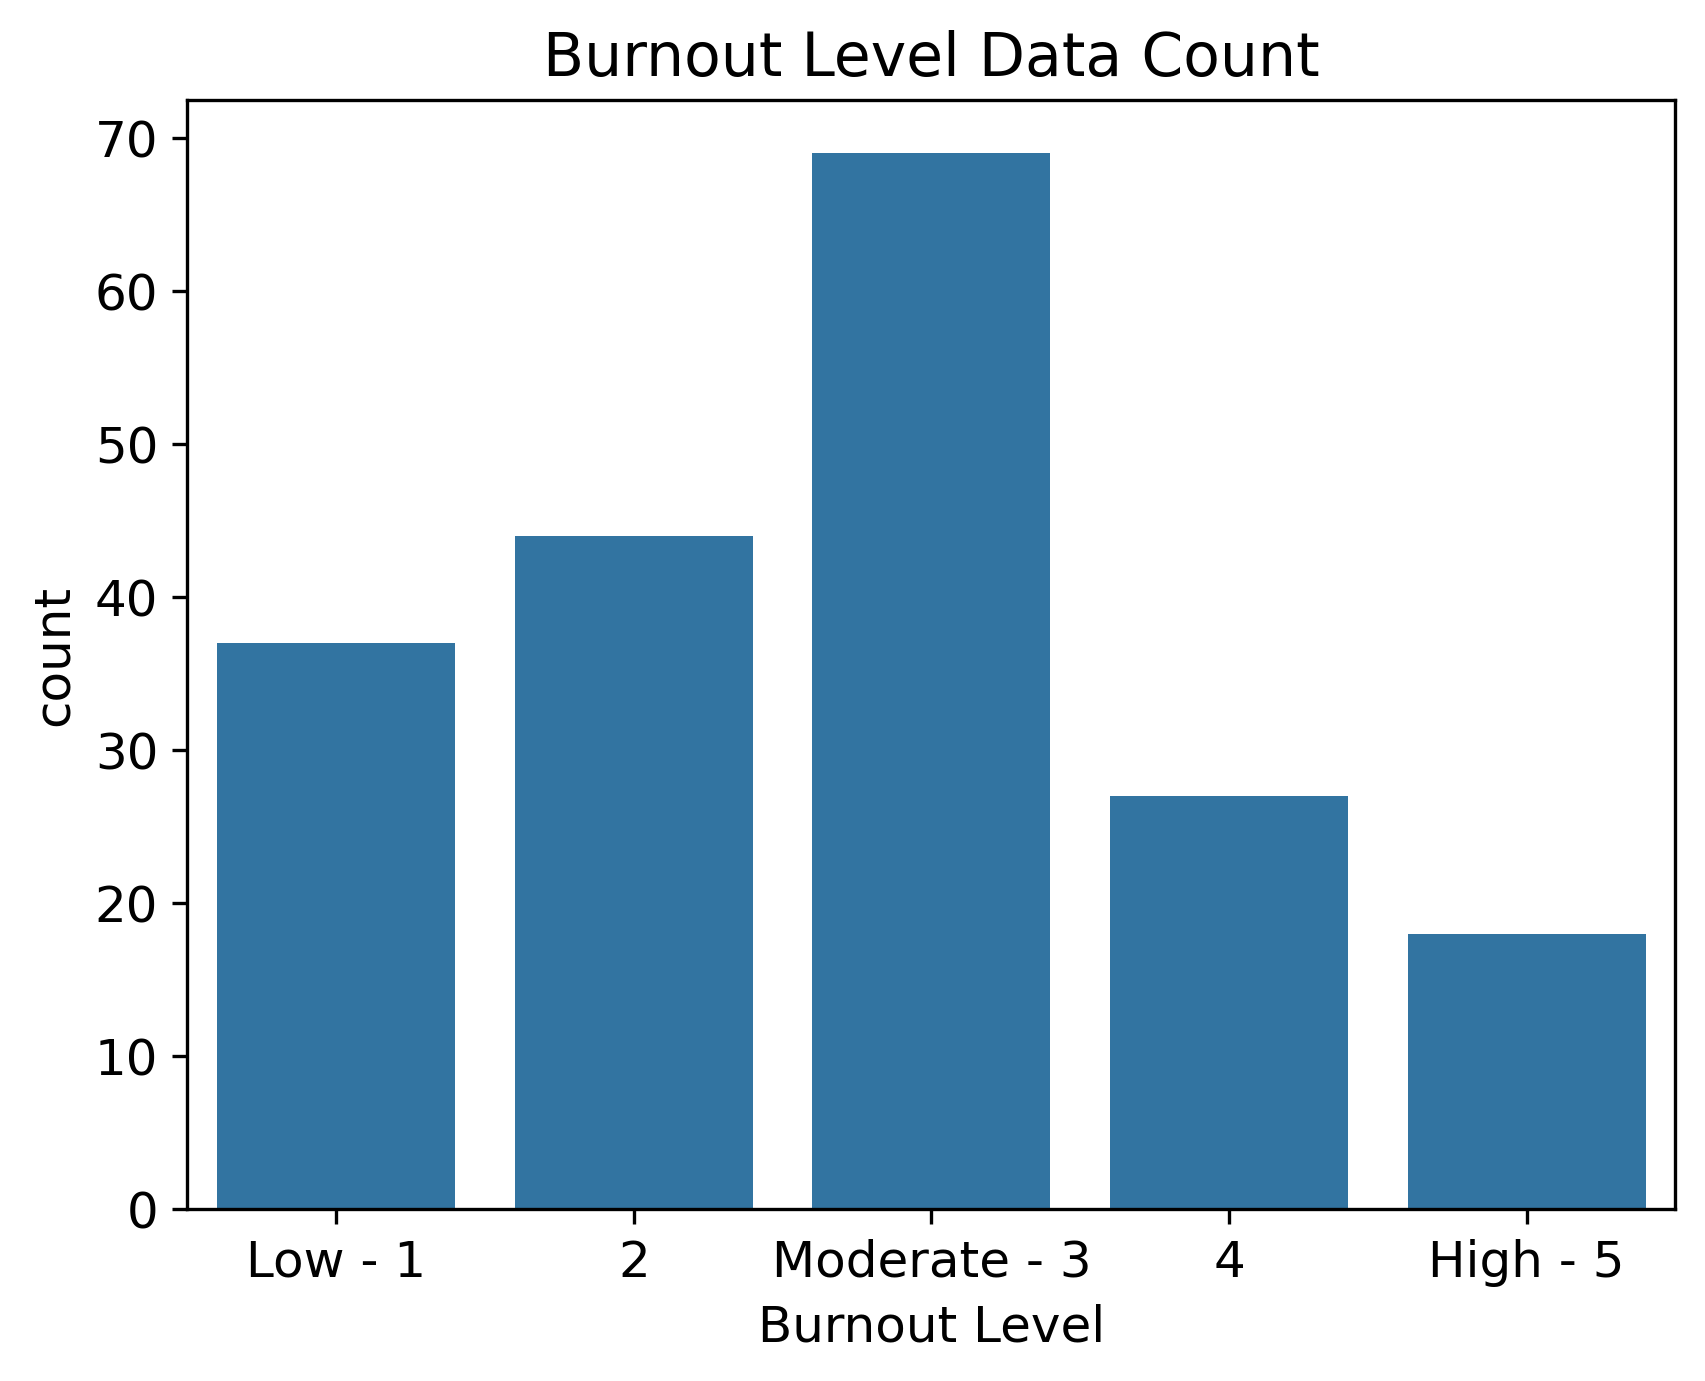

In [18]:
# bar graph of burnout levels count
pyplot.rcParams['figure.dpi'] = 300
pyplot.rcParams['savefig.dpi'] = 300
pyplot.rcParams.update({'font.size': 12})

fig1 = sns.countplot(x = 'Burnout Level', data = clean_data, order=['Low - 1', '2', 'Moderate - 3', '4', 'High - 5'])
pyplot.title('Burnout Level Data Count')
burnout_count = fig1.get_figure()

In [19]:
# cleaning words from burnout level
def extractNum(text):
    if isinstance(text, int):
        return text
    
    num = re.findall(r'\d+', str(text))
    return int(num[0])

clean_data['Burnout Level'] = clean_data['Burnout Level'].apply(extractNum)

In [20]:
# fixing hours columns for graphing
patHours = ["Less than 20", "20-29", "30-39", "40-49", "50+"]
EHR_AdmHours = ["Less than 5", "5-10", "11-15", "16+"]
fixedPat = [10, 24.5, 34.5, 44.5, 50]
fixedEHRAdm = [2, 7.5, 13, 16]

# changes hours to ints that are average of the range
def fixHours(hours, ogHours, fixTo):
    for i in range(len(ogHours)):
        if(ogHours[i] == hours):
            return fixTo[i]
    return hours

graph_data = clean_data.copy()

graph_data['Patient Hours'] = graph_data['Patient Hours'].apply(lambda hours: fixHours(hours, patHours, fixedPat))
graph_data['EHR Hours'] = graph_data['EHR Hours'].apply(lambda hours: fixHours(hours, EHR_AdmHours, fixedEHRAdm))
graph_data['Admin Hours'] = graph_data['Admin Hours'].apply(lambda hours: fixHours(hours, EHR_AdmHours, fixedEHRAdm))

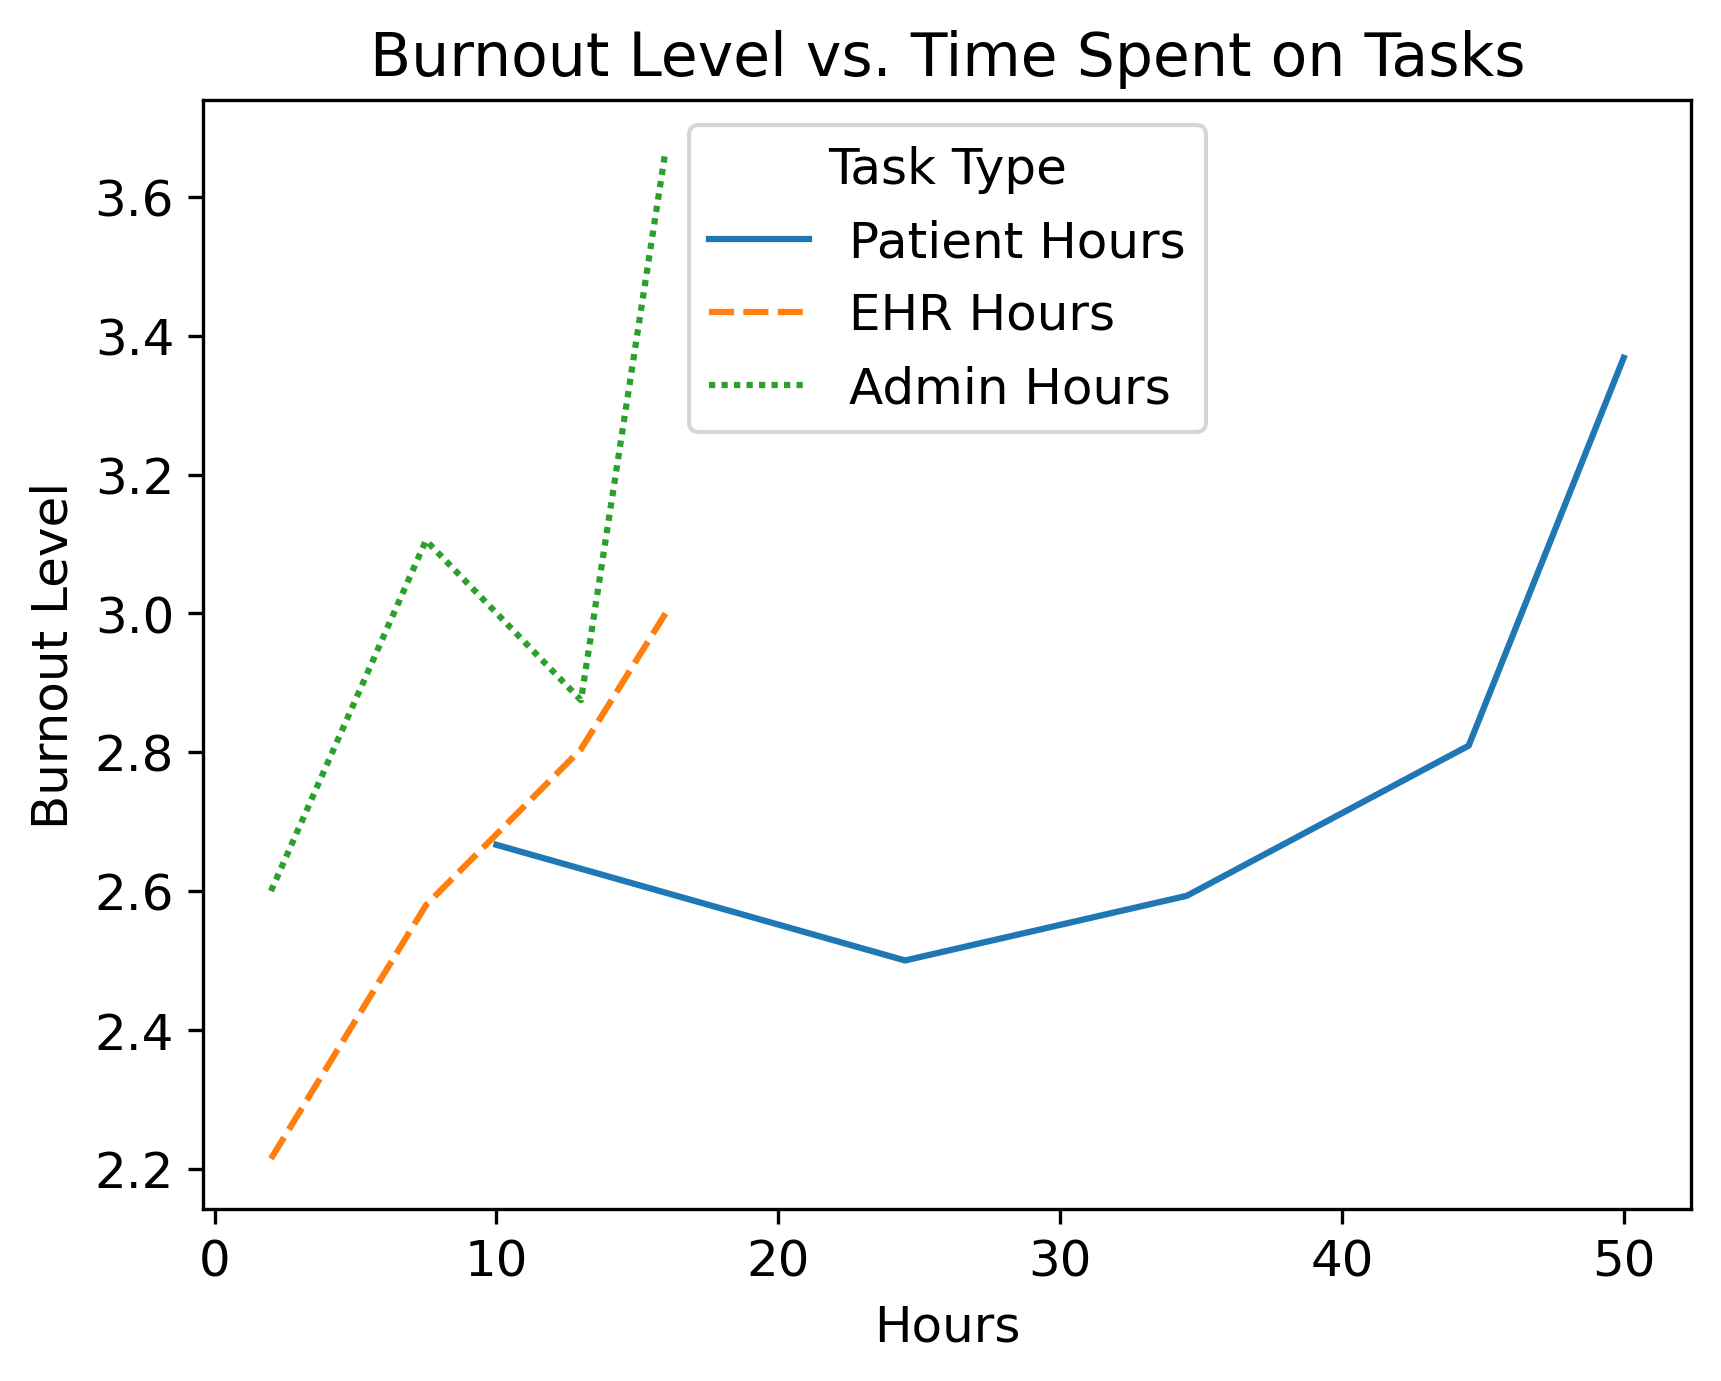

In [27]:
# graph of burnout correlated to hours on ehr, admin, and seeing patients
melted = graph_data.melt(id_vars='Burnout Level', 
                         value_vars=['Patient Hours', 'EHR Hours', 'Admin Hours'],
                         var_name='Task Type', 
                         value_name='Hours')

sns.lineplot(data=melted, x='Hours', y='Burnout Level', hue='Task Type', style='Task Type', errorbar=None)
pyplot.title('Burnout Level vs. Time Spent on Tasks')
pyplot.show()

#later add lineplot for years worked

In [28]:
# splitting data
y = clean_data[['Burnout Level']].copy()
X = clean_data.drop(columns=['Burnout Level'])

In [30]:
# more data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categories = ["Age", "Gender", "Specialty", "Practice Type", "Practice Size", "New Patients", "Years Worked", "Patient Hours", "EHR Hours", "Admin Hours"]
one_hot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
transform = ColumnTransformer([("one_hot", one_hot, categories)], remainder="passthrough")
transform_X = pd.DataFrame(transform.fit_transform(X))

In [ ]:
# split train and test data 80/20
X_train, X_test, y_train, y_test = train_test_split(transform_X, y, test_size=0.2, random_state=10)